# Visualizing Data Using Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Employee.xlsx')

In [3]:
df.head()

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_Code      70 non-null     int64 
 1   Gender             70 non-null     object
 2   Department         70 non-null     object
 3   Annual Salary ($)  70 non-null     int64 
 4   Age                70 non-null     int64 
 5   Work_Experience    70 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.4+ KB


In [5]:
df.isnull().sum()

Employee_Code        0
Gender               0
Department           0
Annual Salary ($)    0
Age                  0
Work_Experience      0
dtype: int64

In [25]:
# Task 1
a=df.groupby(['Department'])['Annual Salary ($)'].sum()
print(a)
print('\nDepartments: ',a.index)
print('Cost to company: ',a.values)

Department
Finance     790000
HR          987000
IT         1282900
Sales      1089000
Name: Annual Salary ($), dtype: int64

Departments:  Index(['Finance', 'HR', 'IT ', 'Sales'], dtype='object', name='Department')
Cost to company:  [ 790000  987000 1282900 1089000]


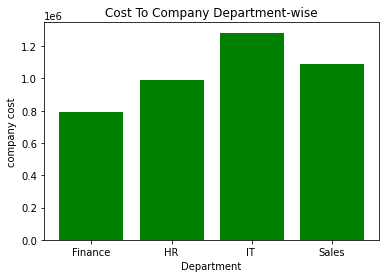

In [26]:
plt.bar(a.index,a.values,color='green')
plt.xlabel('Department')
plt.ylabel('company cost')
plt.title('Cost To Company Department-wise')
plt.show()

IT Department have maximum cost to company

In [50]:
# Task 2
b=pd.crosstab(df.Department,df.Gender,rownames=['Department'],colnames=['Gender'])

print(b.index)
print(b.values)
b

Index(['Finance', 'HR', 'IT ', 'Sales'], dtype='object', name='Department')
[[ 2 11]
 [11  4]
 [10 12]
 [ 4 16]]


Gender,Female,Male
Department,,
Finance,2,11
HR,11,4
IT,10,12
Sales,4,16


In [40]:
b1=df.groupby(['Department','Gender'])['Gender'].count()
print(b1)
print(b1.index)
print(b1.values)

Department  Gender
Finance     Female     2
            Male      11
HR          Female    11
            Male       4
IT          Female    10
            Male      12
Sales       Female     4
            Male      16
Name: Gender, dtype: int64
MultiIndex([('Finance', 'Female'),
            ('Finance',   'Male'),
            (     'HR', 'Female'),
            (     'HR',   'Male'),
            (    'IT ', 'Female'),
            (    'IT ',   'Male'),
            (  'Sales', 'Female'),
            (  'Sales',   'Male')],
           names=['Department', 'Gender'])
[ 2 11 11  4 10 12  4 16]


In [68]:
b2=pd.DataFrame({'Department':['Finance','HR','IT','Sales'],'Female':[2,11,10,4],'Male':[11,4,12,16]})
print(b2)

  Department  Female  Male
0    Finance       2    11
1         HR      11     4
2         IT      10    12
3      Sales       4    16


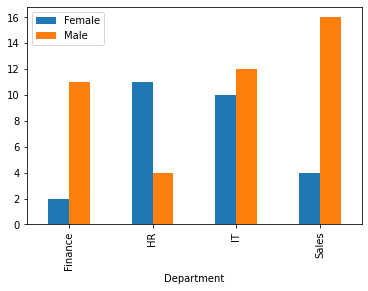

In [65]:
b2.plot(x='Department',kind='bar')
plt.show()

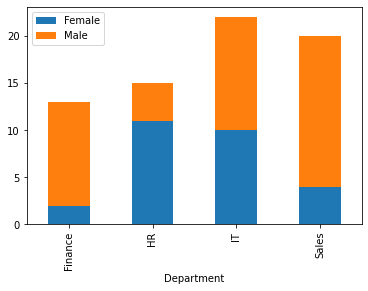

In [72]:
b2.plot(x='Department',kind='bar',stacked=True)
plt.show()

In [60]:
# Task 3
c=df[(df.Department=='IT ')&(df.Work_Experience==0)]
print(c)
c1=c['Annual Salary ($)'].mean()
print('\nThe mean salary: ',c1)

    Employee_Code   Gender Department  Annual Salary ($)  Age  Work_Experience
0             1010    Male        IT               27000   22                0
7             1017    Male        IT               28000   23                0
12            1022    Male        IT               29000   22                0
46            1055    Male        IT               27500   22                0
47            1056  Female        IT               29000   23                0

The mean salary:  28100.0


<AxesSubplot:>

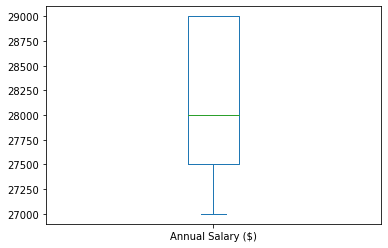

In [63]:
c['Annual Salary ($)'].plot.box()

In [69]:
# Task 4
d=df.groupby(['Department'])['Annual Salary ($)'].sum()
print(d)
print('\nDepartments: ',d.index)
print('Cost to company: ',d.values)

Department
Finance     790000
HR          987000
IT         1282900
Sales      1089000
Name: Annual Salary ($), dtype: int64

Departments:  Index(['Finance', 'HR', 'IT ', 'Sales'], dtype='object', name='Department')
Cost to company:  [ 790000  987000 1282900 1089000]


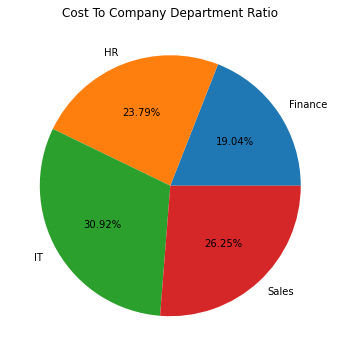

In [78]:
fig,ax=plt.subplots(figsize=(6,6))
ax.pie(d.values,labels=d.index,autopct='%.2f%%')
plt.title('Cost To Company Department Ratio')
plt.show()

(array([11., 17., 13., 10.,  3.,  5.,  3.,  3.,  3.,  2.]),
 array([22. , 24.8, 27.6, 30.4, 33.2, 36. , 38.8, 41.6, 44.4, 47.2, 50. ]),
 <BarContainer object of 10 artists>)

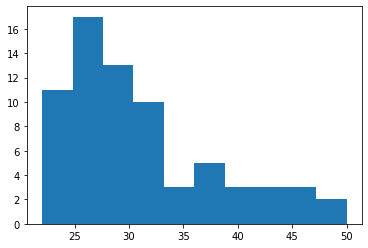

In [90]:
# Task 5
plt.hist(df['Age'])

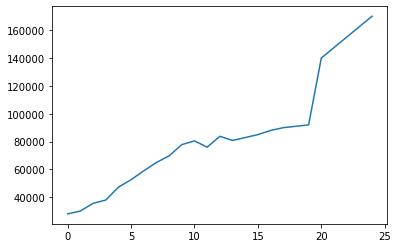

In [91]:
# Task 6
e=df.groupby(['Work_Experience'])['Annual Salary ($)'].mean()
plt.plot(e.index,e.values)
plt.show()

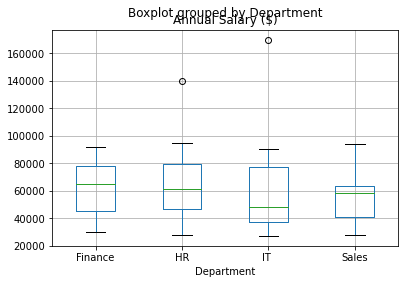

In [92]:
# Task 7
df.boxplot(column=['Annual Salary ($)'],by='Department')
plt.show()

<AxesSubplot:>

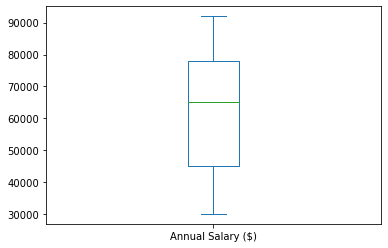

In [93]:
f=df[df.Department=='Finance']
f['Annual Salary ($)'].plot.box()

<AxesSubplot:>

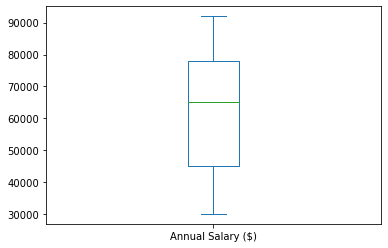

In [94]:
f1=df[df.Department=='HR']
f1['Annual Salary ($)'].plot.box()

<AxesSubplot:>

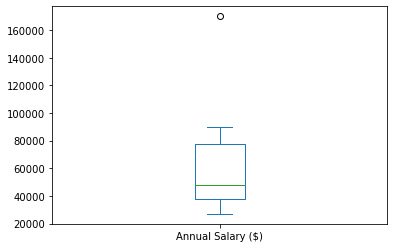

In [95]:
f2=df[df.Department=='IT ']
f2['Annual Salary ($)'].plot.box()

<AxesSubplot:>

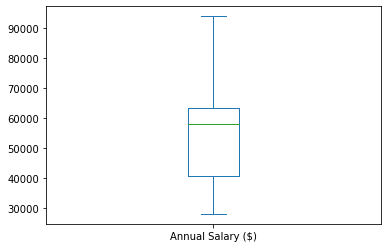

In [96]:
f3=df[df.Department=='Sales']
f3['Annual Salary ($)'].plot.box()